# Google Trends for LaTeX One Pagers

In [20]:
#Setup and Import Required Libraries
from pytrends.request import TrendReq

import time
import numpy as np

import pandas as pd
# plot the data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import datetime
now = datetime.datetime.now()
currentyear = now.year

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Sec-Fetch-Site': 'same-origin',
    'Cookie': 'SIDCC=ACA-OxOnJOC7DS5KiRxIT_fR2QkEWCcC0qnRq2CsEQsF4Sys_RO_vNC35Crs2MB5YdXFgAsV; __Secure-1PSIDCC=ACA-OxP0ptWglmVe-8Y9UjZEA2PjryZYF9U8Da7mYl3v3-UARlu_SF6igP2ExrnNjJIq3n_0; __Secure-3PSIDCC=ACA-OxNgjKevY3Zow3HLaWD6avR6m0Vw9brDKI_2YZ1HqqVhrksBkErpBGhNVcwjaR90uCTacQ; __Secure-1PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; __Secure-3PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; OTZ=7313007_52_52_123900_48_436380; APISID=rGw9b4LlhUzdu9JK/A5FCfs42fPt9ML6c_; HSID=AyERsaCQdeoOCSTaz; NID=511=X8aF5DKahzhIfJnmosQ1ObPEG8zuH2izcRIKsuqYeEylpV2ZHP3pSelOtraRPMq4pgy2wjm7kxo6c7lmnqSxHev6GySI8oINAQB_awzDtax9YDqHEShrtK_WLysYWiVDRMvy_LrNkEmF8G2N13timw27rWOVsasND3EDY4hkYo3oliLUp5CZL3xjGC_M2hz2JvuR5I-ICNWpO32rj4F_ocrG43zfkegl5cJHGT2MCiSUriZCbxP1kaMBPQTG-_Y4JTRakj4E; SAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; SID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3PQihDzktg1v-0nRdHwAujA.; SSID=Agfst-sFEI8JQacAA; __Secure-1PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-1PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3nqCQMxgz8872_h16xzPhcA.; __Secure-3PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-3PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3BncuJgujlOIb3nvCSH52zQ.',
    'Sec-Fetch-Dest': 'document',
    'Accept-Language': 'en-gb',
    'Sec-Fetch-Mode': 'navigate',
    'Host': 'trends.google.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15',
    'Referer': 'https://trends.google.com/',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}



# lets build a function to get the data for a list of keywords
def get_trend_data(keyword):
    time.sleep(1)
    pytrends = TrendReq(hl='en-US', tz=360, retries=3, backoff_factor=0.1, requests_args={"headers": headers}) 
    timeframe = f'2004-01-01 {currentyear}-12-31' # time frame for data

    try:
        pytrends.build_payload([keyword], cat=0, timeframe=timeframe)
        data = pytrends.interest_over_time()
        data['smooth'] = data[keyword].rolling(window=30).mean()
        return data
    except:
        time.sleep(1)
        return np.nan, np.nan


In [28]:

plt.rcParams.update({'font.size': 20})

def export_plot(keyword, year):
    data = get_trend_data(keyword)

    # Create a figure and a single subplot
    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(data.index, data["smooth"], color='black')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove the y axis
    ax.yaxis.set_visible(False)

    # Set the background color to transparent
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)

    # Calculate the midpoint date of the year
    midpoint = datetime.datetime(year, 1, 1) + (datetime.datetime(year+1, 1, 1) - datetime.datetime(year, 1, 1)) / 2

    # Mark the start of the year with a vertical line
    ax.axvline(midpoint, color='black', linestyle='--')

    # Only show the years on the x axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))

    # Make the year bold
    labels = ax.get_xticklabels()
    for label in labels:
        if label.get_text() == str(year):
            label.set_weight('bold')
    # Set the title
    ax.set_title(f'Google Trends', color='black')

    # Create a filename by combining the keyword and year
    filename = f'{keyword}_{year}.png'

    # Save the plot as a PDF
    plt.savefig(filename, format='png')


/Users/jonas/Documents/Wein/Factsheet-Automation/Scraping/.conda/lib/python3.9/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


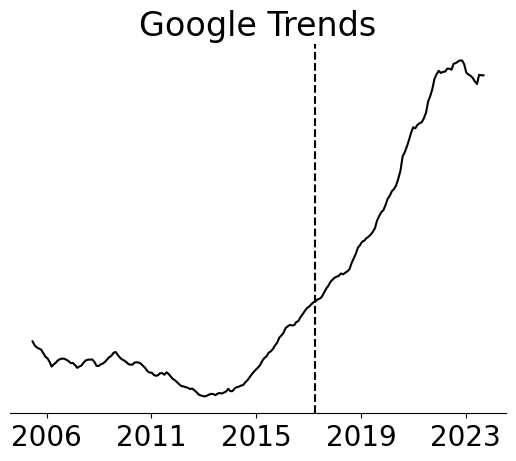

In [29]:
# example for the keyword "Primitivo" and the year 2017
export_plot('Primitivo', 2017)